# Final Project - Ironhack Data Analytics Bootcamp
# Spotify Prediction Model

The below code uses a dataset obtained from the Spotify API that includes registers for over 100k songs and their audio features along with a popularity value. The model built for this project aims to predict how popular a song will be based on its audio features. 

#### Importing the packages to be used

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#### Importing the dataset

In [2]:
spotify=pd.read_csv('./data/SpotifyAudioFeaturesNov2018.csv')

## Data Exploration

A general overview of the data is necessary for a proper understanding

In [3]:
spotify.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


The below is a description of the fields:

FIELD|DESCRIPTION|
:---|:---|
**artist_name**|Author of the track
**track_id**|The Spotify ID for the track
**track_name**|Official name of the track
**acousticness**|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
**danceability**|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
**duration_ms**|The duration of the track in milliseconds.
**energy** |Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
**instrumentalness**|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
**key**|The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
**liveness**|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
**loudness**|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
**mode**|Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
**speechiness**|Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
**tempo**|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
**time_signature**|An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
**valence**|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).




#### Checking the feature data types in order to see if any conversion is needed

In [4]:
spotify.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

We can see that just the columns "artist_name", "track_id", "track_name" are non-numerical columns, we might need to take an action on them in later stages. The rest of columns are numeric and are, in majority, normalized columns with a range between 0 to 1.

In [5]:
spotify.isna().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

In [6]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,116372.000000,116372.000000,1.163720e+05,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000
mean,0.335472,0.582476,2.125462e+05,0.571829,0.230127,5.239894,0.194196,-9.944835,0.607534,0.112204,119.603767,3.883005,0.438393,24.235082
std,0.343066,0.189869,1.243208e+05,0.258560,0.363406,3.603924,0.167389,6.503818,0.488302,0.124382,30.151621,0.508566,0.259566,17.931939
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029500,0.461000,1.640490e+05,0.401000,0.000000,2.000000,0.097400,-11.845250,0.000000,0.038900,96.131000,4.000000,0.222000,10.000000
50%,0.194000,0.606000,2.017730e+05,0.605000,0.000187,5.000000,0.123000,-7.992000,1.000000,0.056000,120.031500,4.000000,0.419000,22.000000
75%,0.620000,0.728000,2.402685e+05,0.776000,0.491000,8.000000,0.234000,-5.701000,1.000000,0.129000,139.783000,4.000000,0.637000,35.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


Based on the data above, we expect to have some outliers in the data. In order to make sure this guess is right, we use boxplots to visually identify the outliers. For our project, we will identify as outliers all registers beyond the three standard deviations threshold or the 0.997 quantile.

In [7]:
def findNumericColumns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics).columns.tolist()

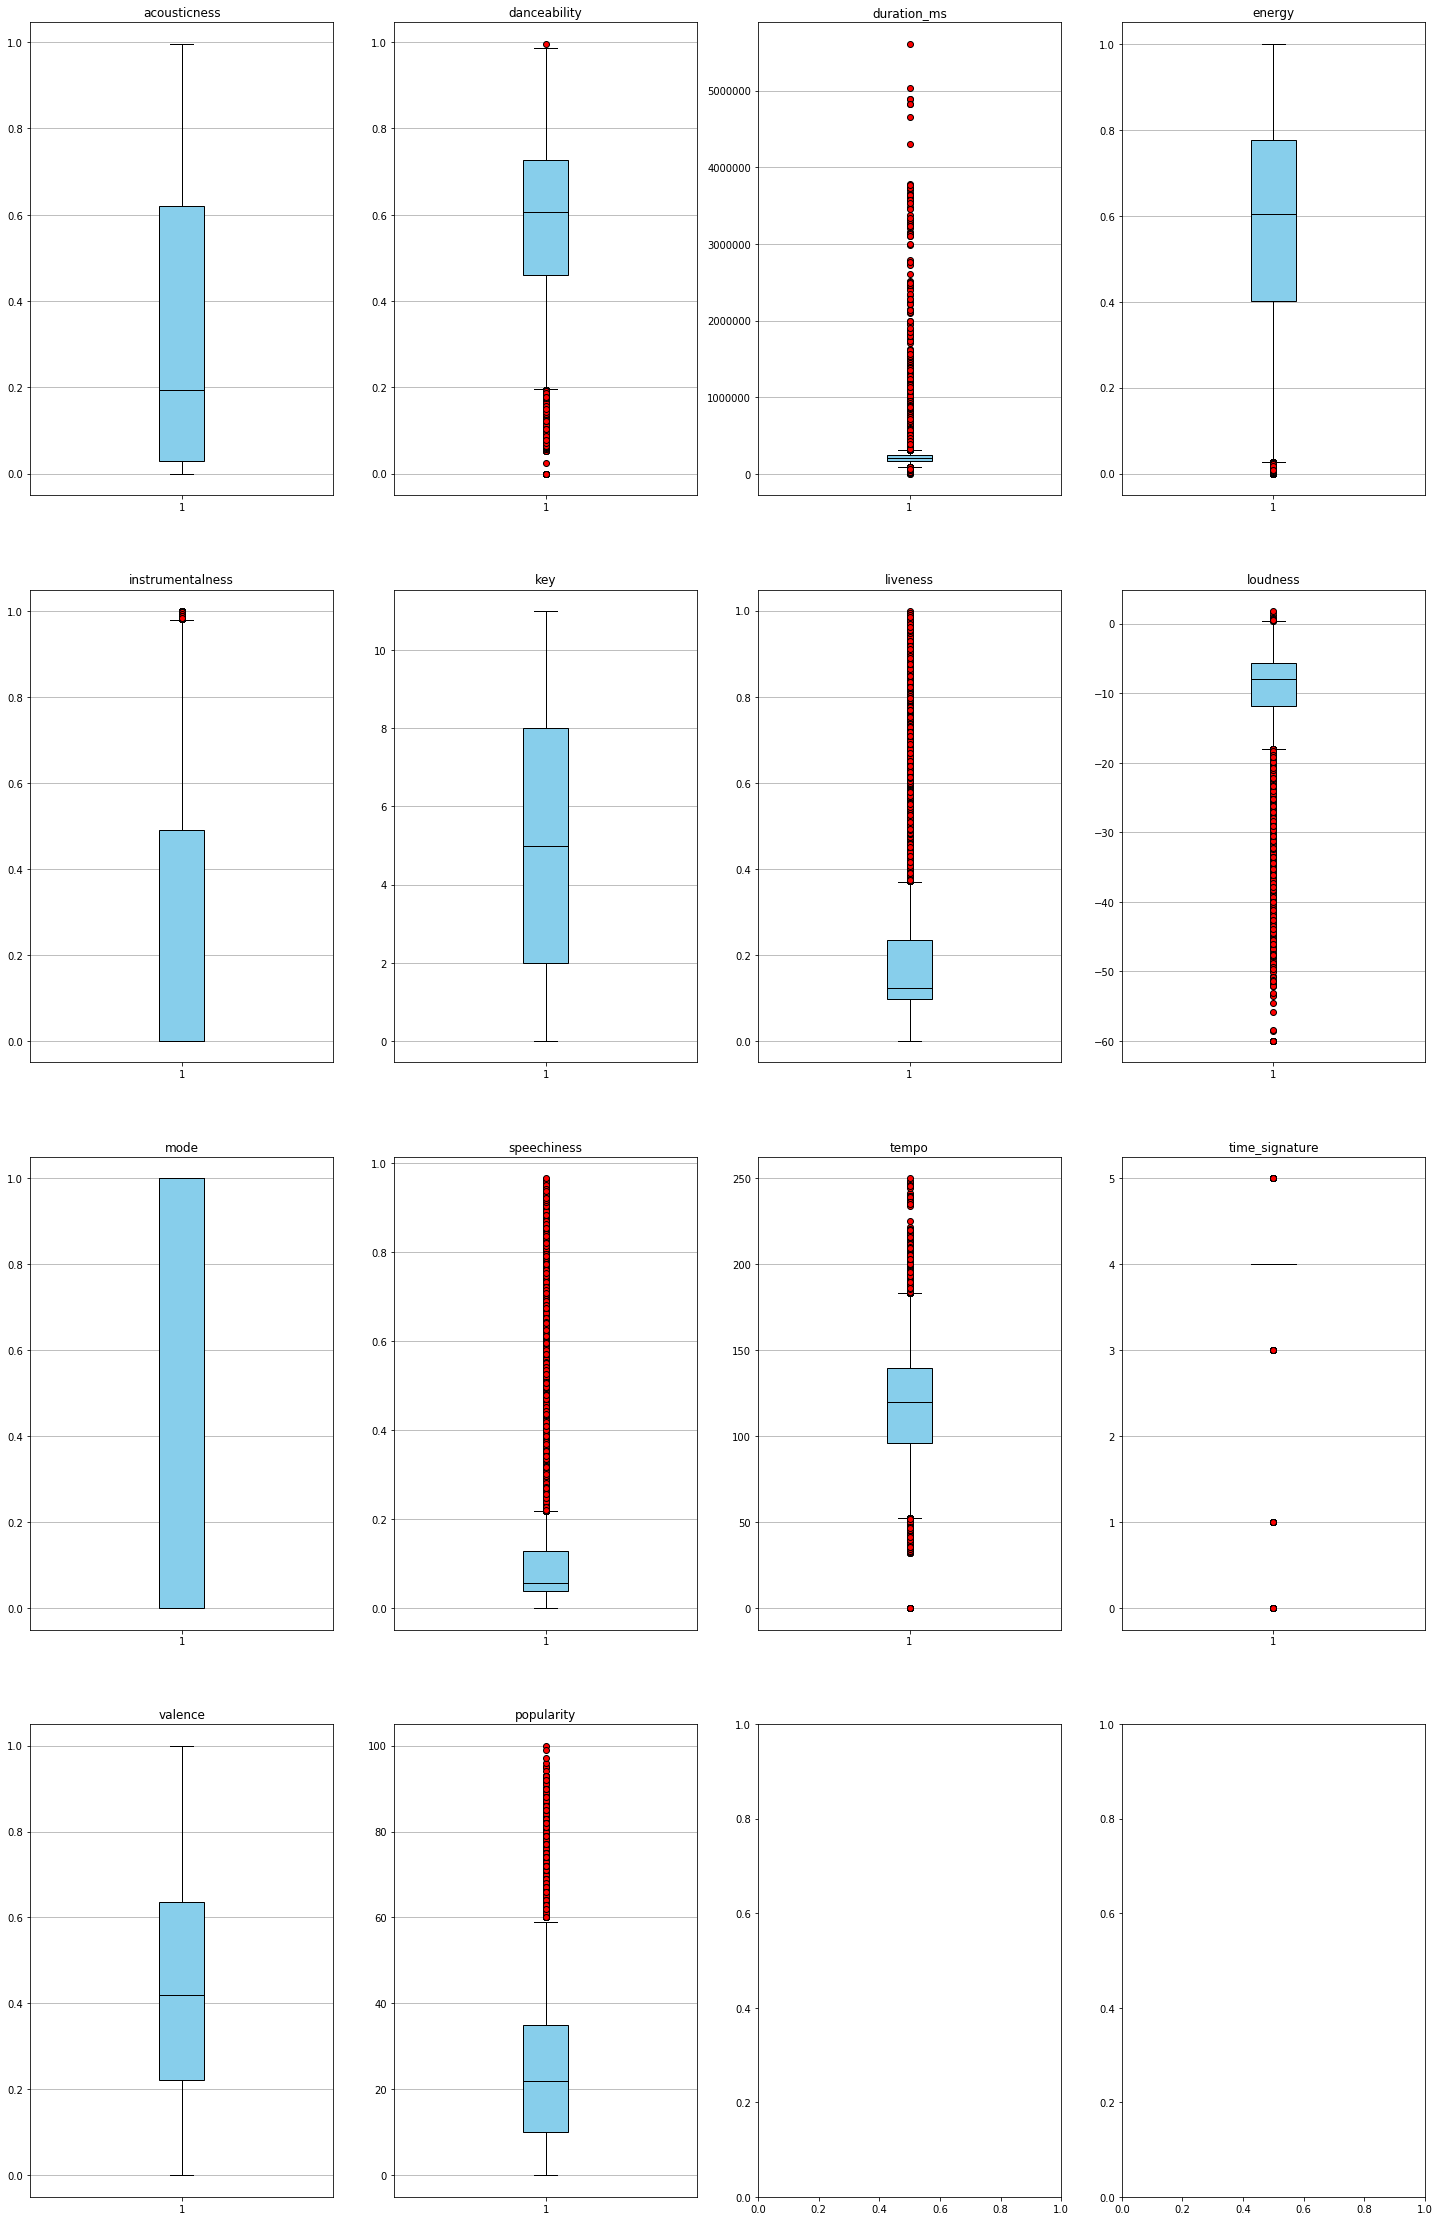

In [8]:
numCols=findNumericColumns(spotify)
f, ax=plt.subplots(math.ceil(len(numCols)/4), 4 ,figsize=(25,40))
for i,e in enumerate(numCols):
    red_outliers = dict(markerfacecolor='r', marker='o')
    ax[int(i/4)][i%4].boxplot(spotify[e],whis=0.997,flierprops=red_outliers, patch_artist=True, medianprops=dict(color='black'), boxprops=dict(facecolor='skyblue', color='black'))
    ax[int(i/4)][i%4].set_title(e)
    ax[int(i/4)][i%4].yaxis.grid(True)

We also want to have a look at the frecuencies by using histograms

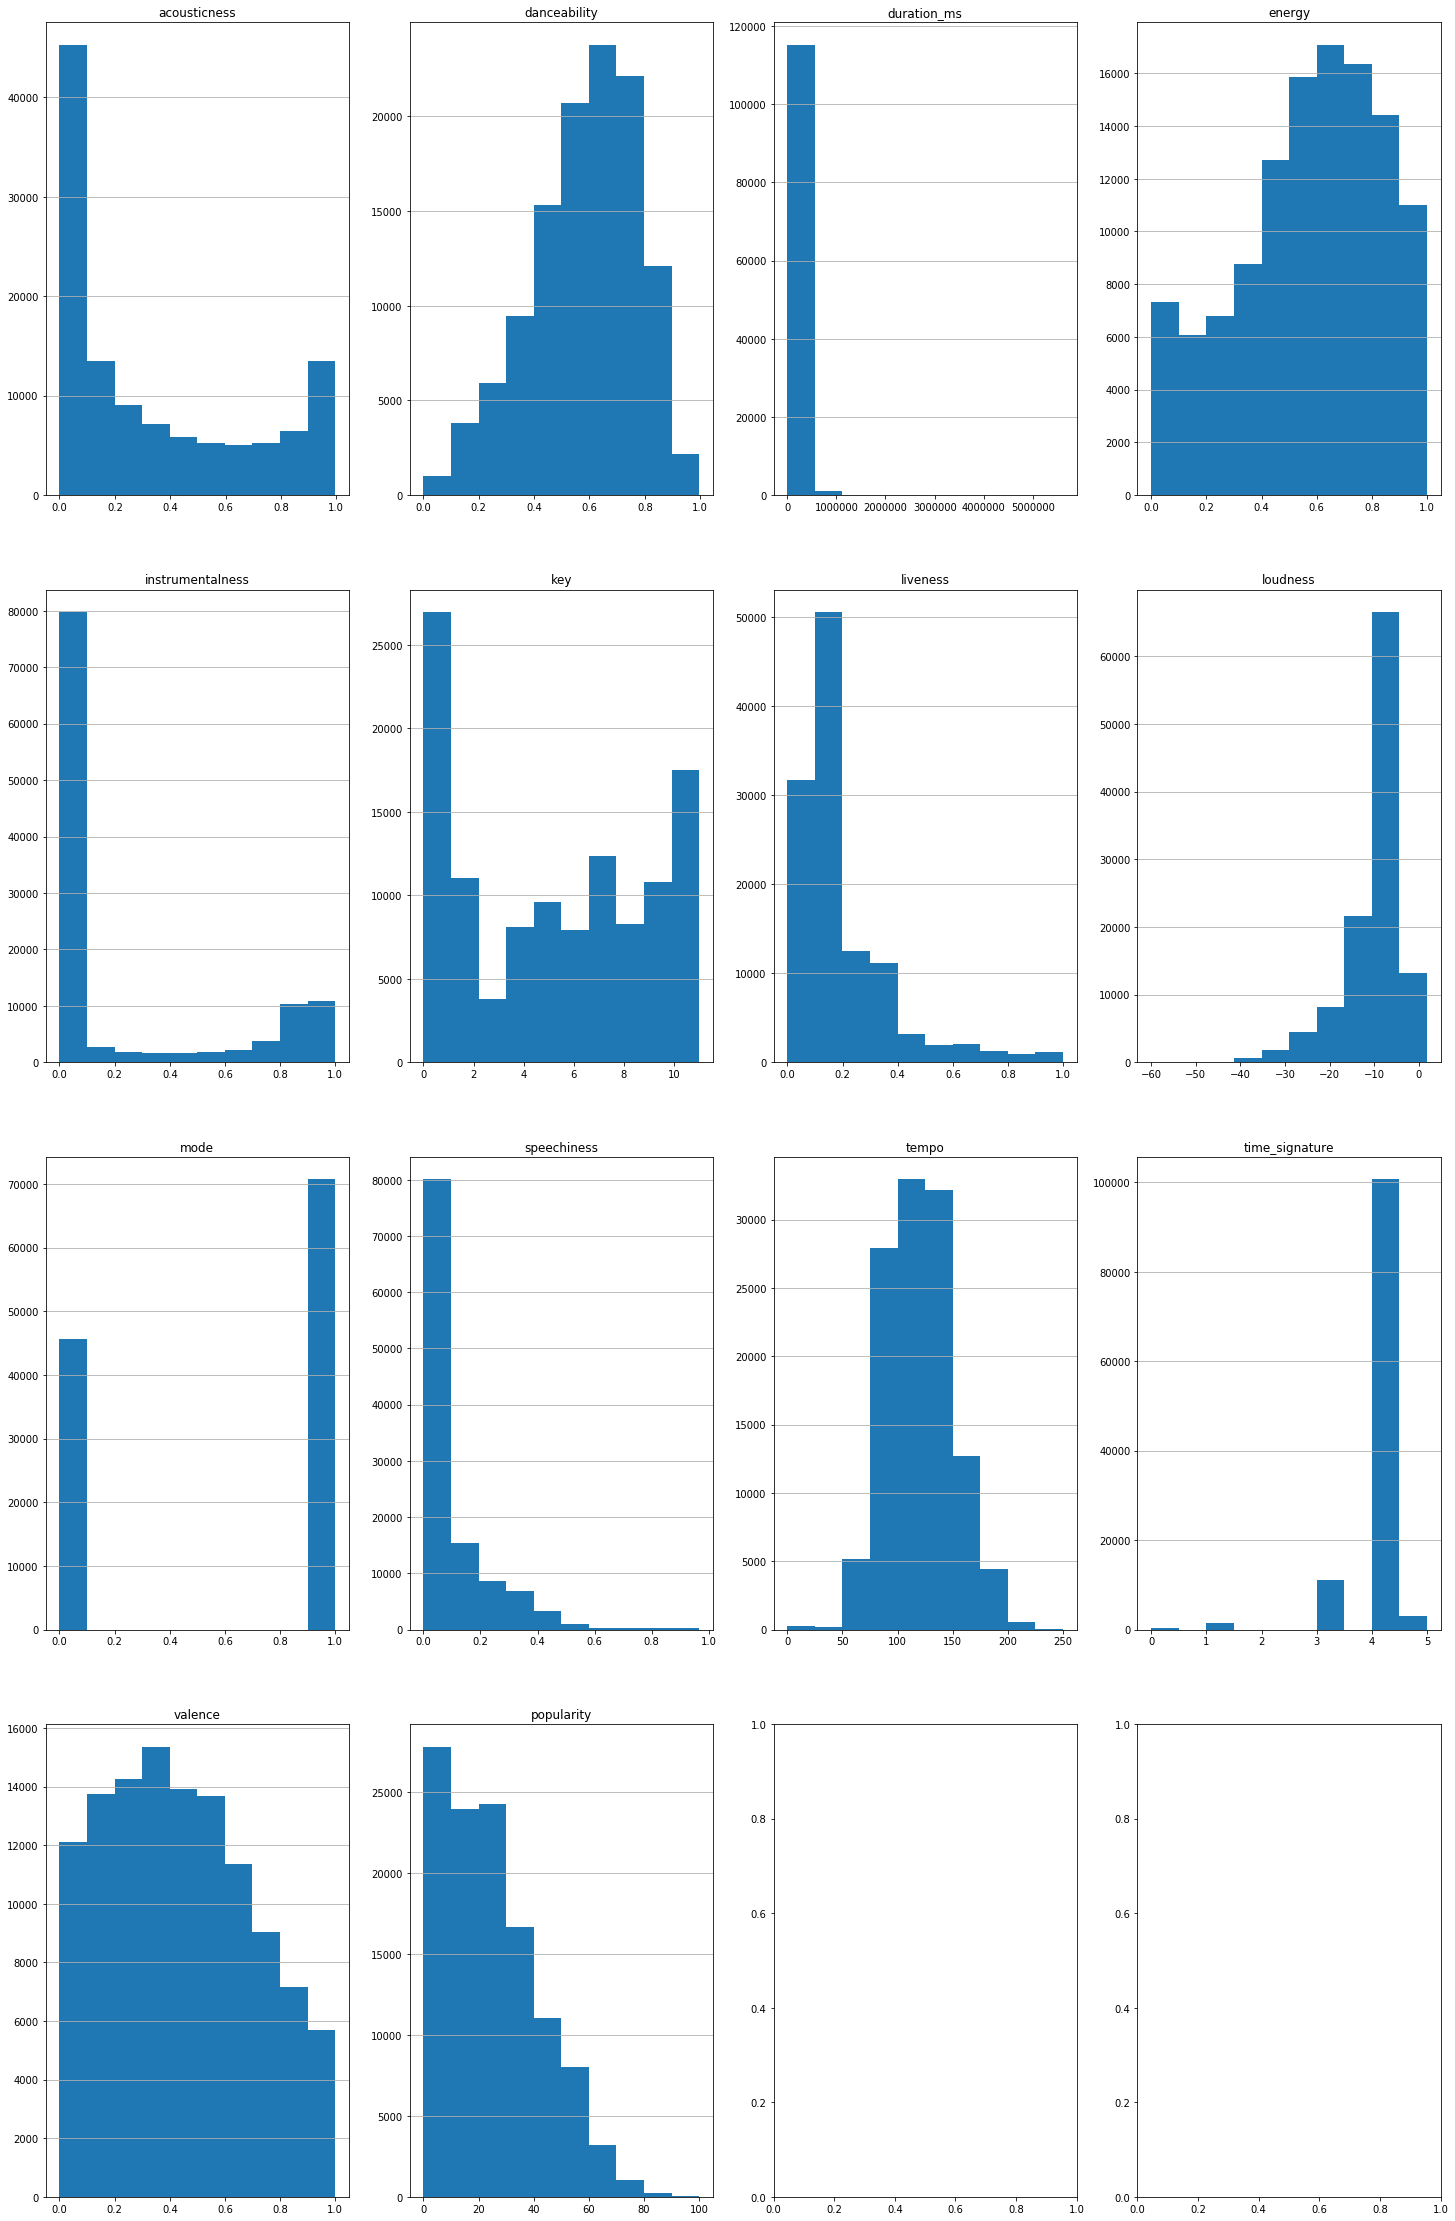

In [9]:
numCols=findNumericColumns(spotify)
f, ax=plt.subplots(math.ceil(len(numCols)/4), 4 ,figsize=(25,40))
for i,e in enumerate(numCols):
    red_outliers = dict(markerfacecolor='r', marker='o')
    ax[int(i/4)][i%4].hist(spotify[e])
    ax[int(i/4)][i%4].set_title(e)
    ax[int(i/4)][i%4].yaxis.grid(True)

We now want to see if linear correlations exists in our model:

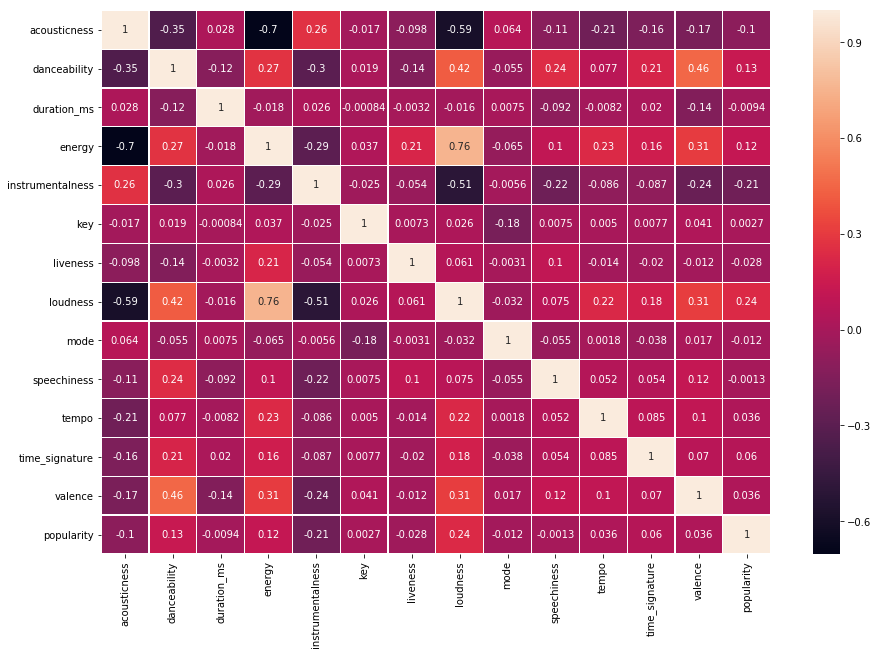

In [10]:
spotifyCorr=spotify.corr()
f, ax=plt.subplots(figsize=(15,10))
sns.heatmap(spotifyCorr, annot=True, linecolor='white', linewidths=0.2)

As we see in the correlation heatmap above, there is no really high correlations between our numeric variables. We might want to follow up with loudness-energy which presents a 0.76 correlation which might need to be actioned.

## Data Manipulation - Data Wrangling

First thing we need to do is decide what we are going to do with the non-numeric columns in our data set, let's have a closer look to each one of them.

In [11]:
spotify.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [12]:
display(len(spotify['artist_name'].value_counts()))
valc=spotify['artist_name'].value_counts()
display(valc)

32105

Johann Sebastian Bach       2841
Wolfgang Amadeus Mozart      929
Armin van Buuren             773
Ludwig van Beethoven         654
Frédéric Chopin              521
Image Sounds                 369
Claude Debussy               330
Waka Flocka Flame            269
Antonio Vivaldi              241
Duo Libano                   240
Binaural Beats Sleep         236
Los Cadetes De Linares       231
Rain Sounds                  188
Above & Beyond               185
Shun Yu                      179
Ron Komie                    175
Franz Schubert               139
George Frideric Handel       127
Pyotr Ilyich Tchaikovsky     124
DJ Fuqua                     118
Eagles                       115
Tiger Lily                   108
Yuuki Sung                   106
Jonathan Hay                 102
Thunderstorm Sound Bank      101
Mike Smith                   100
Chief Keef                    98
Samson Oxmoor                 96
R.E.M.                        86
J3 EDC                        86
          

We can see that the field 'artist_name' holds a large number of unique values hence we can directly apply a one-hot-encoding process; however, we realize the artist column could have an important influence in the popularity of a song, this means we ought to preserve the column. In order to resolve this issue, we have decided that artists with less than 50 songs in the dataset will be grouped under 'Others' since that number does not represent a significant quantity for our model to properly learn. After doing so, we will apply one-hot-encoding to the column.

In [13]:
valOver50=[valc.index[i] for i,e in enumerate(valc) if e>=50]

In [14]:
def classifyToOthers(listToPreserve, df, column):
    res=[]
    for e in df[column]:    
        if e in listToPreserve:
            res.append(e)
        else:
            res.append('Others')
    return res

In [15]:
spotify['artist_name']=classifyToOthers(valOver50,spotify,'artist_name')

In [16]:
spotify['artist_name'].value_counts()

Others                        103870
Johann Sebastian Bach           2841
Wolfgang Amadeus Mozart          929
Armin van Buuren                 773
Ludwig van Beethoven             654
Frédéric Chopin                  521
Image Sounds                     369
Claude Debussy                   330
Waka Flocka Flame                269
Antonio Vivaldi                  241
Duo Libano                       240
Binaural Beats Sleep             236
Los Cadetes De Linares           231
Rain Sounds                      188
Above & Beyond                   185
Shun Yu                          179
Ron Komie                        175
Franz Schubert                   139
George Frideric Handel           127
Pyotr Ilyich Tchaikovsky         124
DJ Fuqua                         118
Eagles                           115
Tiger Lily                       108
Yuuki Sung                       106
Jonathan Hay                     102
Thunderstorm Sound Bank          101
Mike Smith                       100
C

The second numeric column 'track_id' defines a unique code for each song in order to be identified, this does not add any extra value to our model so we have decided to remove it.

In [17]:
spotifyFilt=spotify.drop(columns=['track_id'])
spotifyFilt.head()

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Others,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,Others,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,Others,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Others,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Others,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [18]:
spotifyFilt.isna().sum()

artist_name         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

The only remaining numeric column is 'track_name', we can guess some relationships between the name and the popularity, however such relations are difficult to describe and are potentially not strong. Therefore, we have decided to drop this column.

!!!Possible NLP to be applied to the track name column
!!!!cheack featured songs and classify

In [19]:
spotifyFilt=spotifyFilt.drop(columns=['track_name'])
spotifyFilt.head()

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Others,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,Others,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,Others,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Others,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Others,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [20]:
spotifyFilt.isna().sum()

artist_name         0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

It is now time to apply the one-hot-encoding to the artist_name column:

In [21]:
spotifyFilt=pd.get_dummies(spotifyFilt)
spotifyFilt.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_name_Thunderstorm Sound Bank,artist_name_Tiger Lily,artist_name_Tray Loop,artist_name_Waka Flocka Flame,artist_name_Waterfall Sounds,artist_name_Wolfgang Amadeus Mozart,artist_name_YoungBoy Never Broke Again,artist_name_Yuuki Sung,artist_name_Кино,artist_name_Михаил Шуфутинский
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,...,0,0,0,0,0,0,0,0,0,0
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,...,0,0,0,0,0,0,0,0,0,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,...,0,0,0,0,0,0,0,0,0,0
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,...,0,0,0,0,0,0,0,0,0,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,...,0,0,0,0,0,0,0,0,0,0


In [22]:
spotifyFilt.isna().sum()

acousticness                              0
danceability                              0
duration_ms                               0
energy                                    0
instrumentalness                          0
key                                       0
liveness                                  0
loudness                                  0
mode                                      0
speechiness                               0
tempo                                     0
time_signature                            0
valence                                   0
popularity                                0
artist_name_Above & Beyond                0
artist_name_Andrei Krylov                 0
artist_name_Anthem Lights                 0
artist_name_Antonio Vivaldi               0
artist_name_Armin van Buuren              0
artist_name_BONES                         0
artist_name_Binaural Beats Sleep          0
artist_name_Chief Keef                    0
artist_name_Chuy Vega           

We now need to decide what to do with the outliers, as mentioned in the previous section, registers that are beyond the treshold of 3 standard deviation will be considered outliers. Let's see how many values we are speaking about.

In [23]:
spotify['danceability'].std()

0.18986894744929309

In [24]:
def getOutliers(df, column, nStd):
    res=[]
    mx=(df[column].mean()+nStd*df[column].std())
    mn=(df[column].mean()-nStd*df[column].std())
    for i,r in enumerate(df[column]):
        if r>mx or r<mn:
            res.append(i)
    return res

In [25]:
FiltSpotifyClean=spotifyFilt.copy()
display(len(FiltSpotifyClean))
listOut=[]
for e in numCols:
    if e!='popularity':    
        listOut.append(getOutliers(FiltSpotifyClean, e, 3))
listOut=[e for i in listOut for e in i]
FiltSpotifyClean.drop([e for e in listOut], inplace=True)
    
display(len(FiltSpotifyClean))

116372

106687

In [26]:
106375/116372

0.9140944557109958

We have identified the outliers and saved them in a different dataframe. In a latter stage we will train our model with and without the outlier to se which one returns better results. 

In [27]:
spotifyFilt.isna().sum()

acousticness                              0
danceability                              0
duration_ms                               0
energy                                    0
instrumentalness                          0
key                                       0
liveness                                  0
loudness                                  0
mode                                      0
speechiness                               0
tempo                                     0
time_signature                            0
valence                                   0
popularity                                0
artist_name_Above & Beyond                0
artist_name_Andrei Krylov                 0
artist_name_Anthem Lights                 0
artist_name_Antonio Vivaldi               0
artist_name_Armin van Buuren              0
artist_name_BONES                         0
artist_name_Binaural Beats Sleep          0
artist_name_Chief Keef                    0
artist_name_Chuy Vega           

## Model Creation, Train and Testing

### Linear Regression Model

In [28]:
y_lin=spotifyFilt['popularity']
X_lin=spotifyFilt.drop(columns=['popularity'])

In [29]:
linModel=linear_model.LinearRegression()
linModel.fit(X_lin, y_lin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
linModel.score(X_lin, y_lin)

0.11417054953280725

### Classification models

For classification purposes we will convert the popularity field in a categorical feature containing 10 different clases:

* 0: 1-10
* 1: 11-20
* ...
* 9: 99-100

Reducing the number of classes will make our models more accurate

In [31]:
spotifyFilt['popularity'].value_counts()

0      11504
25      2655
17      2609
19      2564
24      2534
15      2517
16      2512
26      2501
18      2494
27      2470
13      2451
20      2438
21      2430
14      2405
22      2388
28      2380
1       2367
29      2323
12      2241
23      2183
11      2156
30      2146
31      2056
10      2042
32      1946
8       1864
9       1864
7       1856
6       1798
33      1780
       ...  
70       180
71       134
72       131
73       123
74       108
75        99
76        74
77        61
78        54
79        52
81        38
80        33
82        30
85        27
84        24
83        22
87        15
86        13
89        13
88        12
90        12
93         6
92         6
91         5
95         4
96         1
94         1
97         1
99         1
100        1
Name: popularity, Length: 100, dtype: int64

In [32]:
Clas=spotifyFilt.copy()
Clas['popularityClas']=pd.cut(Clas['popularity'],[-1,0,20,40,60,80,100], labels=[0,20,40,60,80,100])
Clas['popularityClas'].value_counts()

20     42751
40     39750
60     18368
0      11504
80      3767
100      232
Name: popularityClas, dtype: int64

In [33]:
Clas['popularityClas'].isna().sum()

0

In [34]:
Clas[['popularity','popularityClas']].groupby(['popularity','popularityClas']).agg({'popularity':'count'})

,,popularity
popularity,popularityClas,
0,0,11504
1,20,2367
2,20,1723
3,20,1723
4,20,1543
5,20,1584
6,20,1798
7,20,1856
8,20,1864


In [35]:
y=Clas['popularityClas']
X=Clas.drop(columns=['popularity','popularityClas'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
len(X_train), len(X_test), len(y_train), len(y_test)

(104734, 11638, 104734, 11638)

We also define a function to represent the confusion matrix later steps

In [37]:
def confusionMatrixHeatmap(cm, labels):
    totals = cm.sum(axis=1)
    cm_total = (np.ones(cm.shape)*totals).transpose()
    m2 = np.round(((cm/cm_total)*100).astype(float))
    np.set_printoptions(precision=2)
    f, ax=plt.subplots(figsize=(15,10))
    sns.heatmap(m2, annot=True, linecolor='white', linewidths=0.2,
                xticklabels=labels, yticklabels=labels)
    ax.set_title('CONFUSION MATRIX')
    plt.xlabel('Classified as')
    plt.ylabel('Real Values')
    

## Logistic Regression Model

In [38]:
logModel=LogisticRegression()
logModel.fit(X_train, y_train)

/home/albertocastellanos/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/albertocastellanos/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logModel.score(X_train, y_train)

0.37641071667271375

In [40]:
y_pred_test_log=logModel.predict(X_test)
y_pred_test_log

array([20, 40, 20, ..., 20, 20, 40])

array([[   0,  791,  377,    0,    0,    0],
       [   0, 3023, 1205,    0,    0,    0],
       [   0, 2621, 1360,    0,    0,    0],
       [   0, 1141,  728,    0,    0,    0],
       [   0,  219,  150,    0,    0,    0],
       [   0,   11,   12,    0,    0,    0]])

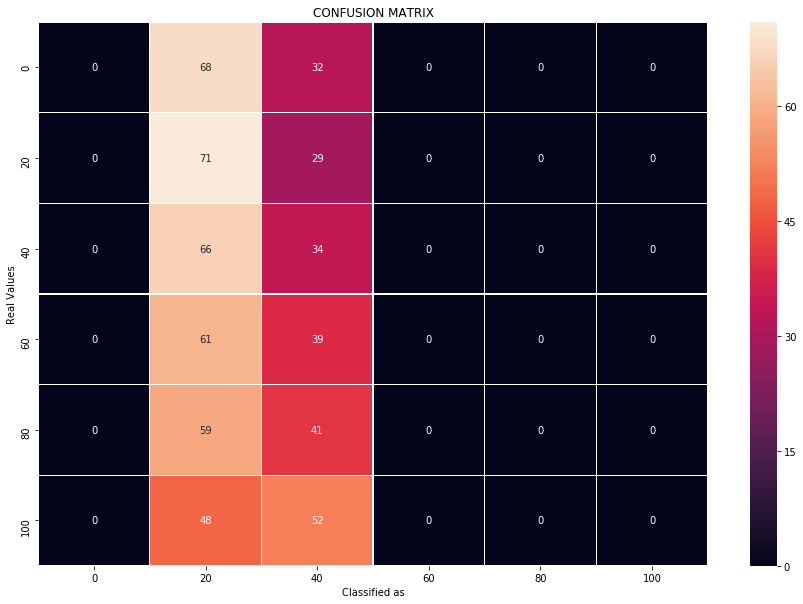

In [41]:
cmlog=confusion_matrix(y_test, y_pred_test_log)
display(cmlog)
confusionMatrixHeatmap(cmlog, [0,20,40,60,80,100])

In [69]:
metrics.accuracy_score(y_test, y_pred_test_log)

0.3766111015638426

## SVC

In [42]:
svcModel=SVC()

In [43]:
#svcModel.fit(X_train,y_train)

In [44]:
#svcModel.score()

## Decision Tree

In [54]:
dtModel=tree.DecisionTreeClassifier()

In [55]:
dtModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
dtModel.score(X_train, y_train)

0.9978803444917601

In [58]:
y_pred_test_dt=dtModel.predict(X_test)

In [70]:
metrics.accuracy_score(y_test, y_pred_test_dt)

0.3693933665578278

array([[ 306,  349,  347,  134,   32,    0],
       [ 360, 1919, 1300,  541,  103,    5],
       [ 318, 1351, 1555,  631,  118,    8],
       [ 120,  501,  672,  464,  102,   10],
       [  28,   95,  114,   77,   55,    0],
       [   0,    9,    7,    6,    1,    0]])

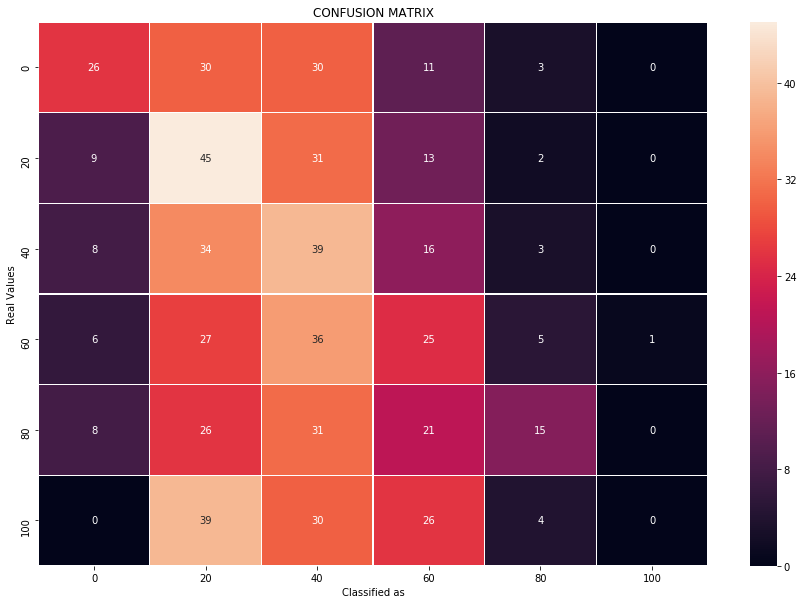

In [60]:
cmdt=confusion_matrix(y_test, y_pred_test_dt)
display(cmdt)
confusionMatrixHeatmap(cmdt, [0,20,40,60,80,100])

## Random Forest

In [45]:
rfModel=RandomForestClassifier()
rfModel.fit(X_train, y_train)

/home/albertocastellanos/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rfModel.score(X_train, y_train)

0.9843126396394676

In [47]:
y_pred_test_rf=rfModel.predict(X_test)
y_pred_test_rf

array([40, 20,  0, ..., 40, 40, 40])

In [73]:
metrics.accuracy_score(y_test, y_pred_test_rf)

0.4122701495102251

array([[ 269,  496,  338,   59,    6,    0],
       [ 200, 2474, 1287,  261,    6,    0],
       [ 177, 1715, 1796,  285,    8,    0],
       [  66,  740,  806,  245,   12,    0],
       [   8,  144,  155,   48,   14,    0],
       [   1,    8,    8,    5,    1,    0]])

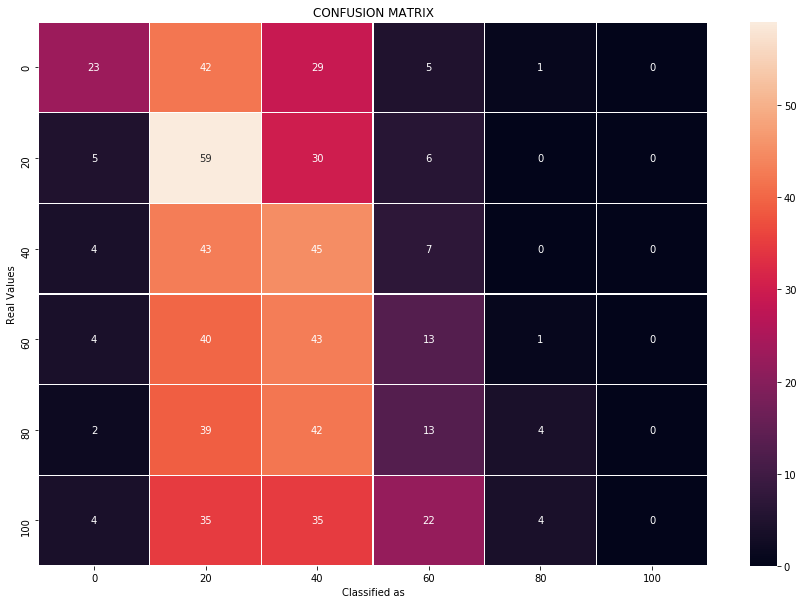

In [72]:
cmcf=confusion_matrix(y_test, y_pred_test_rf)
display(cmcf)
confusionMatrixHeatmap(cmcf, [0,20,40,60,80,100])

### Cross validation

In [81]:
# cv=10 because it's been scientifically demonstrated that value is optimum for classification
# scoring is set to accuracy since accuracy is the evaluation matrix 
scores = cross_val_score(rfModel, X, y, cv=10, scoring='accuracy')
scores

array([0.43, 0.38, 0.39, 0.41, 0.39, 0.38, 0.38, 0.38, 0.38, 0.43])

In [82]:
scores.mean()

0.3941579680653084

In [89]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFECV



# create the RFE model and select 3 attributes
rfecv = RFECV(rfModel, 3)
rfecv.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfecv.support_)
print(rfecv.ranking_)

/home/albertocastellanos/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False  True  True False  True False False False
  True False False False  True  True False False False False  True  True
 False False False  True  True  True  True False False  True False  True
 False False  True False  True False False False False False  True  True
 False  True False False  True  True  True  True False False False False
  True False False False False  True False  True  True False  True  True
 False  True  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 13  6  2  1  1 10  1  6  5  3
  1  2 10 12  1  1  5 11  3 13  1  1 11 14 15  1  1  1  1 14 10  1  8  1
  5  6  1  4  1 14  4 15 12  7  1  1  2  1 13  8  1  1  1  1 15  9  4  7
  1 12  9  8  3  1  7  1  1 11  1  1  9  1  1]


In [ ]:
rfecv.score(X_train, y_train)

In [90]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE



# create the RFE model and select 3 attributes
rfe = RFE(rfModel, 3)
rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False  True False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[ 2  4  1  3  8  9  7  1 10  6  1 12  5 22 84 57 47 20 37 63 38 50 61 51
 24 52 56 78 16 21 54 74 48 82 31 34 69 67 81 33 14 23 13 80 71 40 64 18
 62 55 29 42 28 79 43 83 72 66 11 36 53 35 77 65 25 46 15 30 85 60 58 49
 41 73 68 76 44 27 59 45 17 70 19 26 75 39 32]


In [91]:
rfe.score(X_train, y_train)

0.9778390971413294

In [92]:
y_pred_test_rfe=rfe.predict(X_test)

In [93]:
metrics.accuracy_score(y_test, y_pred_test_rfe)

0.3572778827977316

## K Nearest Neighbours

In [63]:
knnModel=KNeighborsClassifier(n_neighbors=6)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [64]:
knnModel.score(X_train, y_train)

0.5232589226039299

In [65]:
y_pred_test_knn=knnModel.predict(X_test)
y_pred_test_knn

array([20, 20, 20, ...,  0, 20, 20])

In [74]:
metrics.accuracy_score(y_test, y_pred_test_knn)

0.34593572778827975

array([[ 213,  516,  369,   68,    2,    0],
       [ 346, 2280, 1362,  237,    2,    1],
       [ 324, 2006, 1389,  248,   14,    0],
       [ 128,  908,  678,  144,   11,    0],
       [  28,  182,  133,   26,    0,    0],
       [   0,   10,    7,    6,    0,    0]])

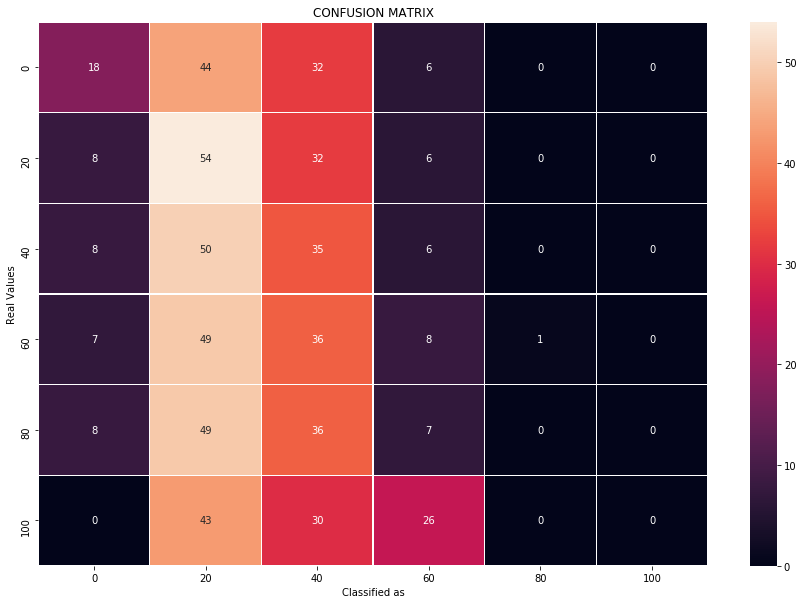

In [66]:
cmknn=confusion_matrix(y_test, y_pred_test_knn)
display(cmknn)
confusionMatrixHeatmap(cmknn, [0,20,40,60,80,100])

### Cross validation

In [78]:
# cv=10 because it's been scientifically demonstrated that value is optimum for classification
# scoring is set to accuracy since accuracy is the evaluation matrix 
scores = cross_val_score(knnModel, X, y, cv=10, scoring='accuracy')
scores

array([0.34, 0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.34, 0.34])

In [79]:
scores.mean()

0.33920524346584874